In [1]:
from pyecharts import options as opts
from pyecharts.charts import Map, Funnel
import pandas as pd
import numpy as np
df = pd.read_csv('profile_lifetime_activity.csv')
df.head(5)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,PROFILE_ID,PROFILE_CREATED,CLASS,FIRST_COMPLETED_ACTION,FIRST_SEND,FIRST_BALANCE,FIRST_TOP_UP,FIRST_ACCOUNT_DETAILS,FIRST_DIRECT_DEBIT,FIRST_CARD,FIRST_ASSETS,Unnamed: 11
0,37422618,2023-03-06 21:42:35,Personal,2023-03-06 21:51:07,NaN,2023-03-06 21:51:07,2023-03-06 21:51:07,NaN,NaN,2023-03-30 22:14:14,NaN,NaN
1,36936417,2023-02-22 03:04:45,Personal,2023-02-22 04:50:26,2023-02-22 04:50:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36317267,2023-02-02 19:49:40,Personal,2023-02-02 20:01:15,NaN,2023-02-02 20:01:15,2023-02-02 20:01:15,2023-02-28 13:22:34,2023-12-29 08:26:08,2023-02-11 00:07:39,NaN,NaN
3,35414880,2023-01-06 11:55:47,Business,2023-01-06 12:18:15,NaN,2023-01-06 12:18:15,2023-01-06 12:18:15,2023-01-19 17:00:16,NaN,NaN,NaN,NaN
4,37073258,2023-02-25 19:07:02,Personal,2023-03-06 18:57:54,2023-03-06 18:57:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.describe()

,PROFILE_ID,Unnamed: 11
count,1.000000e+04,0.0
mean,3.825546e+07,NaN
std,1.762419e+06,NaN
min,3.525099e+07,NaN
25%,3.671146e+07,NaN
50%,3.823176e+07,NaN
75%,3.978412e+07,NaN
max,4.131708e+07,NaN


In [3]:
# Function to display the count of non-null values and unique categories in a DataFrame
def data_info(df):
    print(f'{df.info()}')
    data_info_df = pd.DataFrame(index=df.columns.tolist(), columns=['Non-Null Count', 'Unique Categories', 'Content (First 10 Values)'])
    
    for col in df.columns.tolist():
        content = ' '.join([str(val) for val in df[col].unique().tolist()[:10]]).replace('nan', '')
        unique_count = len(df[col].unique().tolist())
        total_count = len(df[col].tolist())
        missing_count = df[df[col].isna()].shape[0]
        
        data_info_df.loc[col, 'Non-Null Count'] = total_count - missing_count
        data_info_df.loc[col, 'Unique Categories'] = unique_count
        data_info_df.loc[col, 'Content (First 10 Values)'] = content
    
    return data_info_df

data_info(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PROFILE_ID              10000 non-null  int64  
 1   PROFILE_CREATED         10000 non-null  object 
 2   CLASS                   10000 non-null  object 
 3   FIRST_COMPLETED_ACTION  10000 non-null  object 
 4   FIRST_SEND              5165 non-null   object 
 5   FIRST_BALANCE           5879 non-null   object 
 6   FIRST_TOP_UP            5879 non-null   object 
 7   FIRST_ACCOUNT_DETAILS   3172 non-null   object 
 8   FIRST_DIRECT_DEBIT      507 non-null    object 
 9   FIRST_CARD              3336 non-null   object 
 10  FIRST_ASSETS            225 non-null    object 
 11  Unnamed: 11             0 non-null      float64
dtypes: float64(1), int64(1), object(10)
memory usage: 937.6+ KB
None


,Non-Null Count,Unique Categories,Content (First 10 Values)
PROFILE_ID,10000,10000,37422618 36936417 36317267 35414880 37073258 3...
PROFILE_CREATED,10000,9999,2023-03-06 21:42:35 2023-02-22 03:04:45 2023-0...
CLASS,10000,2,Personal Business
FIRST_COMPLETED_ACTION,10000,9985,2023-03-06 21:51:07 2023-02-22 04:50:26 2023-0...
FIRST_SEND,5165,5151,2023-02-22 04:50:26 2023-03-06 18:57:54 2023-...
FIRST_BALANCE,5879,5880,2023-03-06 21:51:07 2023-02-02 20:01:15 2023-...
FIRST_TOP_UP,5879,5880,2023-03-06 21:51:07 2023-02-02 20:01:15 2023-...
FIRST_ACCOUNT_DETAILS,3172,3172,2023-02-28 13:22:34 2023-01-19 17:00:16 2023-...
FIRST_DIRECT_DEBIT,507,505,2023-12-29 08:26:08 2023-06-20 07:26:33 2023-...
FIRST_CARD,3336,3337,2023-03-30 22:14:14 2023-02-11 00:07:39 2023-...


In [4]:
df = df.drop('Unnamed: 11', axis=1) 


In [5]:
df.duplicated().sum()

0

In [6]:
import pandas as pd
df = pd.read_csv("PROFILE_LIFETIME_ACTIVITY.csv")

# count
total_customers = len(df)  
completed_action = df["FIRST_COMPLETED_ACTION"].notna().sum()  
topup_users = df["FIRST_TOP_UP"].notna().sum()  
assets_users = df["FIRST_ASSETS"].notna().sum()  

# calculate unite conversation rate
print(f"Step 1 (Registered): {total_customers} (100%)")
print(f"Step 2 (First Action): {completed_action} ({completed_action/total_customers:.2%})")
print(f"Step 3 (Top Up): {topup_users} ({topup_users/completed_action:.2%})")
print(f"Step 4 (Assets): {assets_users} ({assets_users/topup_users:.2%})")

# total conversation
conversion_rate_1 = total_customers / total_customers
conversion_rate_2 = completed_action / total_customers
conversion_rate_3 = topup_users / total_customers
conversion_rate_4 = assets_users / total_customers
print(f"step1 Conversion Rate to Assets: {conversion_rate_1:.2%}")
print(f"step2 Conversion Rate to Assets: {conversion_rate_2:.2%}")
print(f"step3 Conversion Rate to Assets: {conversion_rate_3:.2%}")
print(f"step4 Conversion Rate to Assets: {conversion_rate_4:.2%}")



Step 1 (Registered): 10000 (100%)
Step 2 (First Action): 10000 (100.00%)
Step 3 (Top Up): 5879 (58.79%)
Step 4 (Assets): 225 (3.83%)
step1 Conversion Rate to Assets: 100.00%
step2 Conversion Rate to Assets: 100.00%
step3 Conversion Rate to Assets: 58.79%
step4 Conversion Rate to Assets: 2.25%


# class classification


=== Conversion Funnel for Personal ===
Step 1 (Registered): 8487 (100%)
Step 2 (First Action): 8487 (100.00%)
Step 3 (Topup): 4450 (52.43%)
Step 4 (Assets): 162 (1.91%)
Overall Conversion Rate to Assets: 1.91%
Step 1 to Step 2: 100.00%
Step 2 to Step 3: 52.43%
Step 3 to Step 4: 3.64%

=== Conversion Funnel for Business ===
Step 1 (Registered): 1513 (100%)
Step 2 (First Action): 1513 (100.00%)
Step 3 (Topup): 1429 (94.45%)
Step 4 (Assets): 63 (4.16%)
Overall Conversion Rate to Assets: 4.16%
Step 1 to Step 2: 100.00%
Step 2 to Step 3: 94.45%
Step 3 to Step 4: 4.41%


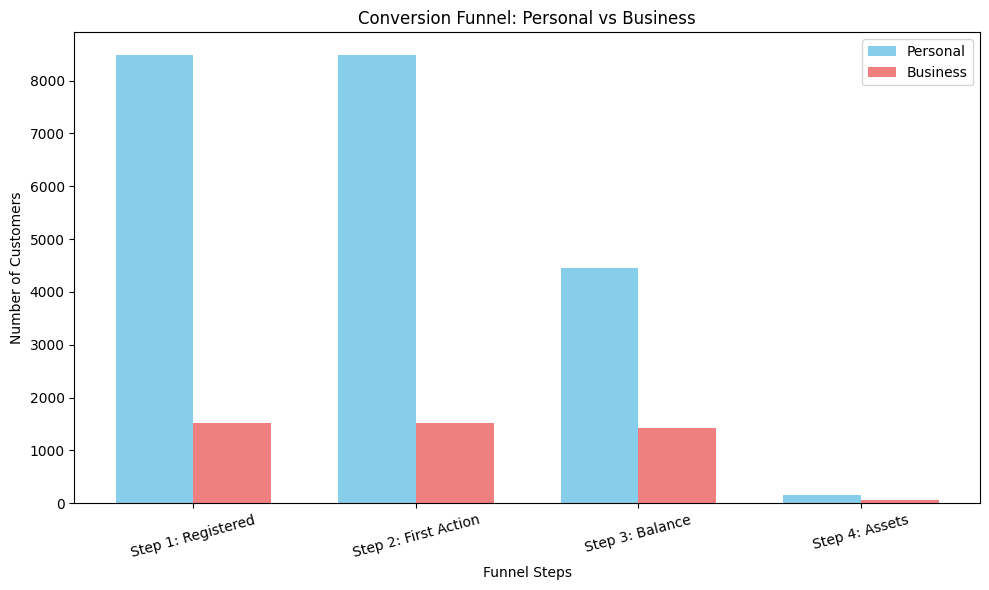

In [7]:
import pandas as pd

personal_df = df[df["CLASS"] == "Personal"]
business_df = df[df["CLASS"] == "Business"]


def calculate_funnel(df, group_name):
    
    step1_registered = len(df)  
    step2_first_action = df["FIRST_COMPLETED_ACTION"].notna().sum()  
    step3_topup = df["FIRST_TOP_UP"].notna().sum()  
    step4_assets = df["FIRST_ASSETS"].notna().sum()  


    overall_conversion_rate = step4_assets / step1_registered if step1_registered > 0 else 0

    step1_to_step2 = step2_first_action / step1_registered if step1_registered > 0 else 0
    step2_to_step3 = step3_topup / step2_first_action if step2_first_action > 0 else 0
    step3_to_step4 = step4_assets / step3_topup if step3_topup > 0 else 0

    print(f"\n=== Conversion Funnel for {group_name} ===")
    print(f"Step 1 (Registered): {step1_registered} (100%)")
    print(f"Step 2 (First Action): {step2_first_action} ({step1_to_step2:.2%})")
    print(f"Step 3 (Topup): {step3_topup} ({step3_topup/step1_registered:.2%})")
    print(f"Step 4 (Assets): {step4_assets} ({overall_conversion_rate:.2%})")
    print(f"Overall Conversion Rate to Assets: {overall_conversion_rate:.2%}")
    print(f"Step 1 to Step 2: {step1_to_step2:.2%}")
    print(f"Step 2 to Step 3: {step2_to_step3:.2%}")
    print(f"Step 3 to Step 4: {step3_to_step4:.2%}")

    return {
        "step1": step1_registered,
        "step2": step2_first_action,
        "step3": step3_topup,
        "step4": step4_assets,
        "overall_conversion_rate": overall_conversion_rate,
        "step1_to_step2": step1_to_step2,
        "step2_to_step3": step2_to_step3,
        "step3_to_step4": step3_to_step4
    }

personal_funnel = calculate_funnel(personal_df, "Personal")
business_funnel = calculate_funnel(business_df, "Business")


import matplotlib.pyplot as plt


steps = ["Step 1: Registered", "Step 2: First Action", "Step 3: Balance", "Step 4: Assets"]
personal_counts = [personal_funnel["step1"], personal_funnel["step2"], personal_funnel["step3"], personal_funnel["step4"]]
business_counts = [business_funnel["step1"], business_funnel["step2"], business_funnel["step3"], business_funnel["step4"]]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(steps))

plt.bar(x, personal_counts, bar_width, label="Personal", color="skyblue")
plt.bar([i + bar_width for i in x], business_counts, bar_width, label="Business", color="lightcoral")


plt.xlabel("Funnel Steps")
plt.ylabel("Number of Customers")
plt.title("Conversion Funnel: Personal vs Business")
plt.xticks([i + bar_width/2 for i in x], steps, rotation=15)
plt.legend()


plt.tight_layout()
plt.show()

# new_user classification

Yearly Distribution:
year
2023    10000
Name: count, dtype: int64

Monthly Distribution:
year_month
2023-01    1730
2023-02    1552
2023-03    1792
2023-04    1615
2023-05    1631
2023-06    1680
Freq: M, Name: count, dtype: int64


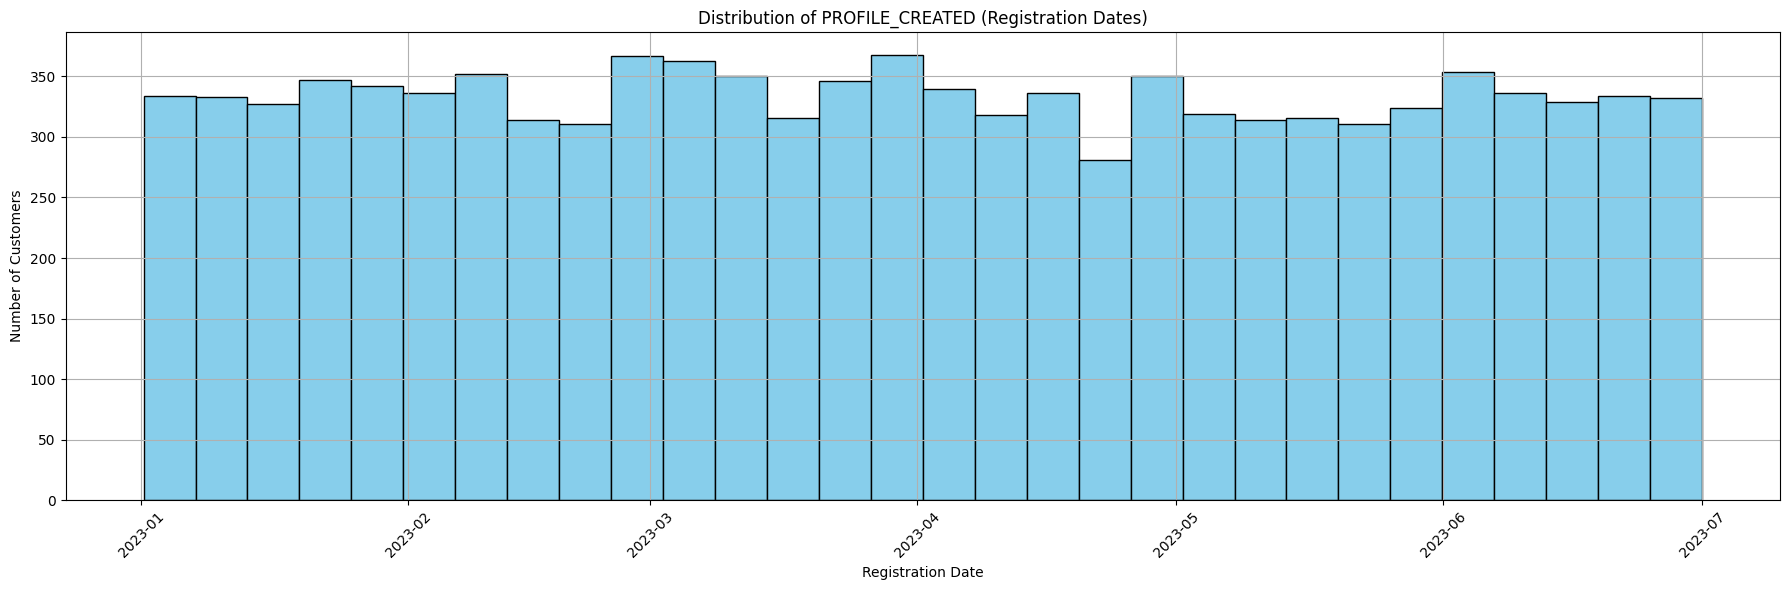

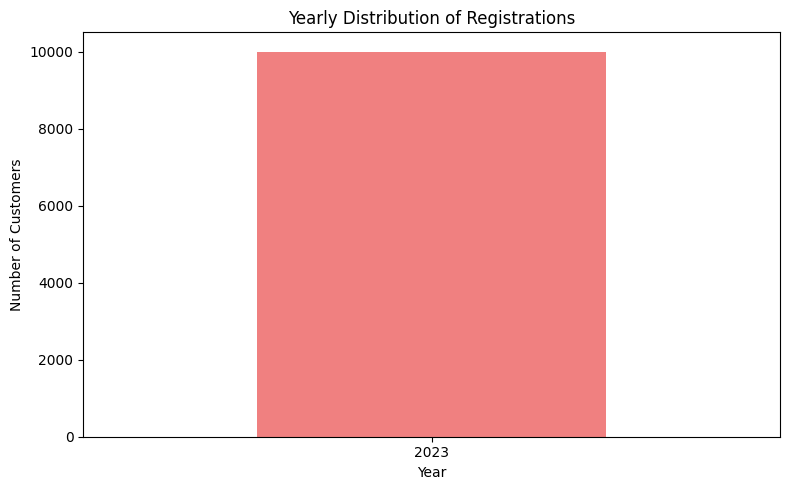

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df["PROFILE_CREATED"] = pd.to_datetime(df["PROFILE_CREATED"])

# year
df["year"] = df["PROFILE_CREATED"].dt.year
yearly_distribution = df["year"].value_counts().sort_index()

# month）
df["year_month"] = df["PROFILE_CREATED"].dt.to_period("M")
monthly_distribution = df["year_month"].value_counts().sort_index()

# distribution
print("Yearly Distribution:")
print(yearly_distribution)
print("\nMonthly Distribution:")
print(monthly_distribution)

# month
plt.figure(figsize=(18, 6))
df["PROFILE_CREATED"].hist(bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of PROFILE_CREATED (Registration Dates)")
plt.xlabel("Registration Date")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# year
plt.figure(figsize=(8, 5))
yearly_distribution.plot(kind="bar", color="lightcoral")
plt.title("Yearly Distribution of Registrations")
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

dataset is balanced.

In [9]:
import pandas as pd

df["month"] = df["PROFILE_CREATED"].dt.month
early_df = df[df["month"].isin([1, 2, 3])]  # 2023-01 to 2023-03
late_df = df[df["month"].isin([4, 5, 6])]   # 2023-04 to 2023-06


early_data = calculate_funnel(early_df, "Early (Jan-Mar 2023)")
late_data = calculate_funnel(late_df, "Late (Apr-Jun 2023)")

table_data = [early_data, late_data]
df_table = pd.DataFrame(table_data)

print(df_table.to_string(index=False))



=== Conversion Funnel for Early (Jan-Mar 2023) ===
Step 1 (Registered): 5074 (100%)
Step 2 (First Action): 5074 (100.00%)
Step 3 (Topup): 2922 (57.59%)
Step 4 (Assets): 101 (1.99%)
Overall Conversion Rate to Assets: 1.99%
Step 1 to Step 2: 100.00%
Step 2 to Step 3: 57.59%
Step 3 to Step 4: 3.46%

=== Conversion Funnel for Late (Apr-Jun 2023) ===
Step 1 (Registered): 4926 (100%)
Step 2 (First Action): 4926 (100.00%)
Step 3 (Topup): 2957 (60.03%)
Step 4 (Assets): 124 (2.52%)
Overall Conversion Rate to Assets: 2.52%
Step 1 to Step 2: 100.00%
Step 2 to Step 3: 60.03%
Step 3 to Step 4: 4.19%
 step1  step2  step3  step4  overall_conversion_rate  step1_to_step2  step2_to_step3  step3_to_step4
  5074   5074   2922    101                 0.019905             1.0        0.575877        0.034565
  4926   4926   2957    124                 0.025173             1.0        0.600284        0.041934


# activation day classification

In [10]:
df["PROFILE_CREATED"] = pd.to_datetime(df["PROFILE_CREATED"], errors='coerce')
df["FIRST_COMPLETED_ACTION"] = pd.to_datetime(df["FIRST_COMPLETED_ACTION"], errors='coerce')
df["FIRST_TOP_UP"] = pd.to_datetime(df["FIRST_TOP_UP"], errors='coerce')
df["FIRST_ASSETS"] = pd.to_datetime(df["FIRST_ASSETS"], errors='coerce')

print("PROFILE_CREATED type:", df["PROFILE_CREATED"].dtype)
print("FIRST_COMPLETED_ACTION type:", df["FIRST_COMPLETED_ACTION"].dtype)

df["activation_days"] = np.where(
    (df["FIRST_COMPLETED_ACTION"].notna()) & (df["PROFILE_CREATED"].notna()),
    (df["FIRST_COMPLETED_ACTION"] - df["PROFILE_CREATED"]).dt.days,
    np.nan
)

PROFILE_CREATED type: datetime64[ns]
FIRST_COMPLETED_ACTION type: datetime64[ns]


In [11]:
df["activation_days"].head(10)

0     0.0
1     0.0
2     0.0
3     0.0
4     8.0
5     0.0
6     0.0
7    92.0
8     0.0
9     1.0
Name: activation_days, dtype: float64


=== Activation Days Statistics ===
count    10000.000000
mean        12.781400
std         43.054233
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        385.000000
Name: activation_days, dtype: float64


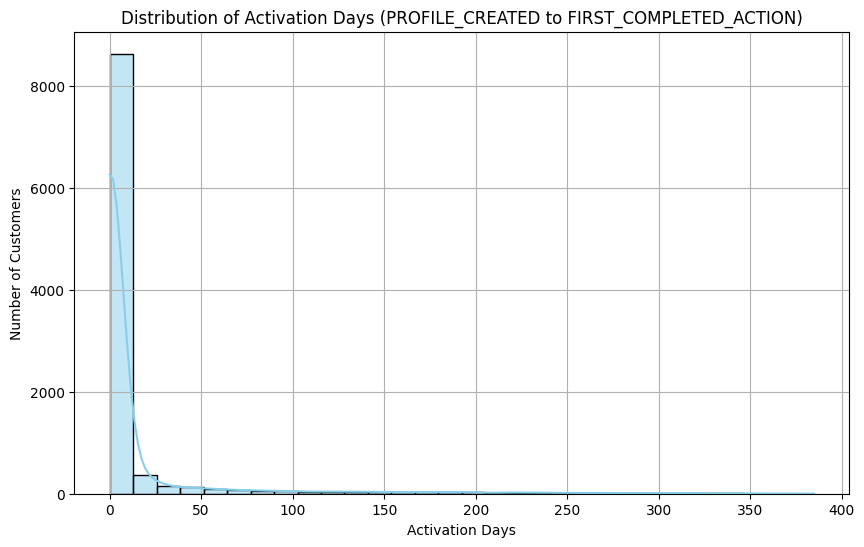


=== Quantiles of Activation Days ===
0.25      0.00
0.50      0.00
0.75      2.00
0.90     25.00
0.95     87.00
0.99    241.01
Name: activation_days, dtype: float64


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
print("\n=== Activation Days Statistics ===")
print(df["activation_days"].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df["activation_days"].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Distribution of Activation Days (PROFILE_CREATED to FIRST_COMPLETED_ACTION)")
plt.xlabel("Activation Days")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

print("\n=== Quantiles of Activation Days ===")
quantiles = df["activation_days"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print(quantiles)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fast_df = df[df["activation_days"] == 0]  # 0
medium_df = df[(df["activation_days"] >= 1) & (df["activation_days"] <= 7)]  # 1-7days
slow_df = df[(df["activation_days"] > 7) & (df["activation_days"] <= 30)]  # 7-30days
very_slow_df = df[df["activation_days"] > 30]  # > 30 days
inactive_df = df[df["FIRST_COMPLETED_ACTION"].isna()]  


fast_data = calculate_funnel(fast_df, "Fast Activation (0 days)")
medium_data = calculate_funnel(medium_df, "Medium Activation (1-7 days)")
slow_data = calculate_funnel(slow_df, "Slow Activation (7-30 days)")
very_slow_data = calculate_funnel(very_slow_df, "Very Slow Activation (>30 days)")
inactive_data = calculate_funnel(inactive_df, "Inactive (No First Action)")


table_data = [fast_data, medium_data, slow_data, very_slow_data, inactive_data]
df_table = pd.DataFrame(table_data)


print(df_table.to_string(index=False))


=== Conversion Funnel for Fast Activation (0 days) ===
Step 1 (Registered): 6892 (100%)
Step 2 (First Action): 6892 (100.00%)
Step 3 (Topup): 4059 (58.89%)
Step 4 (Assets): 146 (2.12%)
Overall Conversion Rate to Assets: 2.12%
Step 1 to Step 2: 100.00%
Step 2 to Step 3: 58.89%
Step 3 to Step 4: 3.60%

=== Conversion Funnel for Medium Activation (1-7 days) ===
Step 1 (Registered): 1499 (100%)
Step 2 (First Action): 1499 (100.00%)
Step 3 (Topup): 789 (52.64%)
Step 4 (Assets): 29 (1.93%)
Overall Conversion Rate to Assets: 1.93%
Step 1 to Step 2: 100.00%
Step 2 to Step 3: 52.64%
Step 3 to Step 4: 3.68%

=== Conversion Funnel for Slow Activation (7-30 days) ===
Step 1 (Registered): 689 (100%)
Step 2 (First Action): 689 (100.00%)
Step 3 (Topup): 479 (69.52%)
Step 4 (Assets): 22 (3.19%)
Overall Conversion Rate to Assets: 3.19%
Step 1 to Step 2: 100.00%
Step 2 to Step 3: 69.52%
Step 3 to Step 4: 4.59%

=== Conversion Funnel for Very Slow Activation (>30 days) ===
Step 1 (Registered): 920 (100%

/var/folders/1j/c_hmjlfn5hj2wfm1wq7x0m_40000gn/T/ipykernel_97067/1885436443.py:24: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Step 3 (Topup): {step3_topup} ({step3_topup/step1_registered:.2%})")


# first action type classification

In [14]:
import pandas as pd

date_cols = ["PROFILE_CREATED", "FIRST_COMPLETED_ACTION", "FIRST_SEND", "FIRST_BALANCE", "FIRST_TOP_UP", "FIRST_ASSETS"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

def determine_first_action(row):
    if pd.isna(row["FIRST_COMPLETED_ACTION"]):
        return "Inactive"
    if row["FIRST_COMPLETED_ACTION"] == row["FIRST_SEND"]:
        return "Transfer"
    if (
        row["FIRST_COMPLETED_ACTION"] == row["FIRST_BALANCE"]
    ):
        return "Balance"
    return "Other"

df["FIRST_ACTION_TYPE"] = df.apply(determine_first_action, axis=1)

groups = {
    "First Action: Transfer": df[df["FIRST_ACTION_TYPE"] == "Transfer"],
    "First Action: Balance": df[df["FIRST_ACTION_TYPE"] == "Balance"],
    "First Action: Top Up": df[df["FIRST_ACTION_TYPE"] == "Top Up"],
    "Inactive (No First Action)": df[df["FIRST_ACTION_TYPE"] == "Inactive"]
}


funnel_results = []
for group_name, subset in groups.items():
    funnel_results.append(calculate_funnel(subset, group_name))

df_funnel = pd.DataFrame(funnel_results)
print(df_funnel.to_string(index=False))



=== Conversion Funnel for First Action: Transfer ===
Step 1 (Registered): 4416 (100%)
Step 2 (First Action): 4416 (100.00%)
Step 3 (Topup): 339 (7.68%)
Step 4 (Assets): 10 (0.23%)
Overall Conversion Rate to Assets: 0.23%
Step 1 to Step 2: 100.00%
Step 2 to Step 3: 7.68%
Step 3 to Step 4: 2.95%

=== Conversion Funnel for First Action: Balance ===
Step 1 (Registered): 5536 (100%)
Step 2 (First Action): 5536 (100.00%)
Step 3 (Topup): 5536 (100.00%)
Step 4 (Assets): 215 (3.88%)
Overall Conversion Rate to Assets: 3.88%
Step 1 to Step 2: 100.00%
Step 2 to Step 3: 100.00%
Step 3 to Step 4: 3.88%

=== Conversion Funnel for First Action: Top Up ===
Step 1 (Registered): 0 (100%)
Step 2 (First Action): 0 (0.00%)
Step 3 (Topup): 0 (nan%)
Step 4 (Assets): 0 (0.00%)
Overall Conversion Rate to Assets: 0.00%
Step 1 to Step 2: 0.00%
Step 2 to Step 3: 0.00%
Step 3 to Step 4: 0.00%

=== Conversion Funnel for Inactive (No First Action) ===
Step 1 (Registered): 0 (100%)
Step 2 (First Action): 0 (0.00%)
St

/var/folders/1j/c_hmjlfn5hj2wfm1wq7x0m_40000gn/T/ipykernel_97067/1885436443.py:24: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Step 3 (Topup): {step3_topup} ({step3_topup/step1_registered:.2%})")


In [15]:

are_equal = (
    (df["FIRST_BALANCE"].notna() & df["FIRST_TOP_UP"].notna()) & 
    (df["FIRST_BALANCE"] == df["FIRST_TOP_UP"])
)


equal_rows = are_equal.sum()
total_rows = len(df)

print("\n=== Check if FIRST_BALANCE and FIRST_TOP_UP are identical ===")
print(f"Total rows: {total_rows}")
print(f"Rows where FIRST_BALANCE equals FIRST_TOP_UP (excluding both NaT): {equal_rows}")
print(f"Rows where they differ: {total_rows - equal_rows}")

if equal_rows == total_rows:
    print("Conclusion: FIRST_BALANCE and FIRST_TOP_UP are completely identical.")
else:
    print("Conclusion: FIRST_BALANCE and FIRST_TOP_UP are NOT completely identical.")

    diff_rows = df[~are_equal][["PROFILE_ID", "FIRST_COMPLETED_ACTION", "FIRST_BALANCE", "FIRST_TOP_UP"]]
    print("\n=== Rows where FIRST_BALANCE and FIRST_TOP_UP differ ===")
    print(diff_rows.head(13))  


=== Check if FIRST_BALANCE and FIRST_TOP_UP are identical ===
Total rows: 10000
Rows where FIRST_BALANCE equals FIRST_TOP_UP (excluding both NaT): 5866
Rows where they differ: 4134
Conclusion: FIRST_BALANCE and FIRST_TOP_UP are NOT completely identical.

=== Rows where FIRST_BALANCE and FIRST_TOP_UP differ ===
    PROFILE_ID FIRST_COMPLETED_ACTION FIRST_BALANCE FIRST_TOP_UP
1     36936417    2023-02-22 04:50:26           NaT          NaT
4     37073258    2023-03-06 18:57:54           NaT          NaT
13    39477545    2023-05-08 02:04:36           NaT          NaT
19    40679241    2023-06-12 13:02:59           NaT          NaT
21    37058529    2023-02-25 11:42:45           NaT          NaT
26    35710649    2023-01-16 05:50:47           NaT          NaT
27    35847030    2023-01-19 18:07:25           NaT          NaT
31    38393279    2023-04-04 15:00:29           NaT          NaT
32    38385828    2023-05-24 21:37:23           NaT          NaT
33    40326426    2023-06-02 08:40:26

In [16]:
profile_ids = [
    38032176, 37416683, 40197480, 39687493, 39803779, 40573184,
    41219649, 38769223, 38226909, 37414189, 36256793, 37385810,
    40667238
]

filtered_df = df[df["PROFILE_ID"].isin(profile_ids)]

filtered_df.head(13)

,PROFILE_ID,PROFILE_CREATED,CLASS,FIRST_COMPLETED_ACTION,FIRST_SEND,FIRST_BALANCE,FIRST_TOP_UP,FIRST_ACCOUNT_DETAILS,FIRST_DIRECT_DEBIT,FIRST_CARD,FIRST_ASSETS,Unnamed: 11,year,year_month,month,activation_days,FIRST_ACTION_TYPE
1354,38032176,2023-03-24 16:14:46,Personal,2023-03-30 09:38:21,NaT,2023-03-30 09:38:21,2023-03-30 19:34:17,2023-03-30 09:38:02,2023-04-17 07:29:27,2023-10-29 20:23:12,NaT,NaN,2023,2023-03,3,5.0,Balance
1717,37416683,2023-03-06 18:39:03,Personal,2023-03-07 21:48:10,NaT,2023-03-07 21:48:10,2023-03-24 06:36:29,2023-03-07 10:54:37,2023-03-08 12:30:18,2023-10-09 02:30:36,NaT,NaN,2023,2023-03,3,1.0,Balance
2025,40197480,2023-05-29 05:22:17,Personal,2023-05-29 17:52:34,NaT,2023-05-29 17:52:34,2023-09-29 12:54:16,2023-05-29 17:33:39,NaN,2023-05-30 18:44:09,NaT,NaN,2023,2023-05,5,0.0,Balance
2188,39687493,2023-05-13 09:21:37,Business,2023-06-06 13:43:07,NaT,2023-06-06 13:43:07,2023-08-10 16:25:50,2023-05-16 10:55:11,NaN,2023-08-05 23:40:29,NaT,NaN,2023,2023-05,5,24.0,Balance
2485,39803779,2023-05-16 20:58:18,Personal,2023-05-17 11:20:28,2023-05-17 11:20:28,2023-06-29 11:21:04,2023-10-20 13:17:30,2024-01-11 18:19:57,NaN,NaN,NaT,NaN,2023,2023-05,5,0.0,Transfer
3580,40573184,2023-06-08 23:01:56,Personal,2023-06-09 07:39:48,2023-06-09 07:39:48,2023-06-12 06:47:30,2023-12-05 15:24:24,NaN,NaN,NaN,NaT,NaN,2023,2023-06,6,0.0,Transfer
3603,41219649,2023-06-28 06:57:39,Personal,2023-07-07 00:59:59,NaT,2023-07-07 00:59:59,2023-08-09 05:51:09,2023-07-10 17:10:38,2023-11-14 08:25:04,2023-07-08 06:41:03,NaT,NaN,2023,2023-06,6,8.0,Balance
4815,38769223,2023-04-15 10:29:33,Personal,2023-04-15 10:43:57,2023-04-15 10:43:57,2023-06-06 10:48:07,2024-01-27 15:28:19,2023-06-06 10:41:28,NaN,NaN,NaT,NaN,2023,2023-04,4,0.0,Transfer
6308,38226909,2023-03-30 14:29:03,Personal,2023-04-02 15:01:48,NaT,2023-04-02 15:01:48,2024-01-26 15:12:18,2023-10-22 14:00:22,NaN,NaN,NaT,NaN,2023,2023-03,3,3.0,Balance
6791,37414189,2023-03-06 17:30:20,Personal,2023-08-28 09:35:03,NaT,2023-08-28 09:35:03,2023-08-30 16:32:02,2023-08-24 16:07:21,2023-08-28 09:40:56,2023-09-27 22:49:10,NaT,NaN,2023,2023-03,3,174.0,Balance


find that the type of first completion just includes send and balance without top up.

In [17]:
inactive_users = df[df["FIRST_ACTION_TYPE"] == "Inactive"]

In [18]:
inactive_users.head(44)

,PROFILE_ID,PROFILE_CREATED,CLASS,FIRST_COMPLETED_ACTION,FIRST_SEND,FIRST_BALANCE,FIRST_TOP_UP,FIRST_ACCOUNT_DETAILS,FIRST_DIRECT_DEBIT,FIRST_CARD,FIRST_ASSETS,Unnamed: 11,year,year_month,month,activation_days,FIRST_ACTION_TYPE
